In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

In [2]:
data = pd.read_csv('features_30_sec.csv')

In [3]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
# music_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [5]:
data[data['label']=='jazz'][0:10]


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
500,jazz.00000.wav,661794,0.344511,0.085002,0.046747,0.001542,1503.869486,554576.511533,1754.216082,283554.933422,...,50.311016,-1.503434,41.141155,0.221949,55.707256,-1.991485,50.006485,-3.353825,49.906403,jazz
501,jazz.00001.wav,661794,0.327992,0.086563,0.022795,0.000239,1266.582864,301864.438070,1691.436718,217152.759634,...,44.129852,-5.185927,43.308018,-5.420732,45.753654,-3.113020,52.689682,-0.798190,98.281067,jazz
502,jazz.00002.wav,661794,0.267729,0.083935,0.080847,0.000992,1064.668667,161084.080653,1050.323423,62123.172997,...,39.962105,-12.292102,54.747944,-6.765346,45.726154,-3.496989,41.440159,-8.645325,73.411758,jazz
503,jazz.00003.wav,661794,0.319254,0.081004,0.059467,0.001298,813.063334,92946.251509,1058.892383,219831.952123,...,47.312241,-2.271646,54.591846,3.882905,38.849575,0.343479,50.033527,-2.221775,56.329369,jazz
504,jazz.00004.wav,661794,0.171939,0.082623,0.108776,0.002177,1039.263106,122594.590614,1421.998044,77384.236997,...,162.883072,1.981593,181.102692,4.976831,162.279419,6.577829,393.161987,-2.425600,472.822266,jazz
505,jazz.00005.wav,661794,0.248190,0.096409,0.107565,0.002235,1268.325308,286413.985546,1546.237439,236513.711094,...,229.142059,0.888774,406.058868,0.979152,332.905426,1.729311,193.043182,-1.356182,212.883530,jazz
506,jazz.00006.wav,661794,0.274877,0.092139,0.098625,0.001363,1219.493013,265266.655037,1459.066150,139164.059284,...,56.547768,-4.474717,59.181240,-5.543734,105.146896,-1.164993,149.450302,-1.099026,132.899658,jazz
507,jazz.00007.wav,661794,0.197231,0.091716,0.093827,0.002241,1169.740409,120004.251085,1355.396462,60239.519901,...,392.932373,-1.465630,188.175278,-0.760350,215.698517,-6.341010,231.288742,-5.511151,210.595062,jazz
508,jazz.00008.wav,661794,0.357344,0.092659,0.118550,0.001406,1304.588618,174239.716026,1636.829732,118069.932356,...,45.251480,-4.238584,62.681034,1.844976,68.109886,-0.441017,75.332947,-4.770748,64.667137,jazz
509,jazz.00009.wav,661794,0.267192,0.089905,0.085358,0.000738,749.353904,45844.412124,1211.148039,87587.136615,...,91.005211,-0.835615,88.915863,-3.871122,65.593773,-2.821767,87.662575,-6.924295,63.047382,jazz


In [6]:
dataset = data[data['label'].isin(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])].drop(['filename','length'],axis=1)
dataset.shape

(1000, 58)

In [7]:
# K Neighbors Classification

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [9]:
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
y.shape

(1000,)

In [10]:
X = MinMaxScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
print(X)
X.shape

[[0.36227871 0.69546819 0.31818806 ... 0.10950252 0.59918888 0.07825493]
 [0.34362165 0.79339231 0.23089399 ... 0.09908114 0.57963963 0.07594669]
 [0.38983171 0.6406919  0.43365239 ... 0.08731703 0.50138091 0.04540464]
 ...
 [0.52914126 0.48324551 0.19448722 ... 0.07641964 0.50491985 0.04398425]
 [0.3874878  0.73872059 0.20011231 ... 0.08886446 0.46287061 0.06693823]
 [0.37918422 0.65027238 0.12523037 ... 0.15461063 0.59731769 0.08372859]]


(1000, 57)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 57) (800,)
Test set: (200, 57) (200,)


In [12]:
knn = KNeighborsClassifier(n_neighbors=6,weights='distance',metric='minkowski',p=2)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance')

In [14]:
pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.86      0.92      0.89        13
           2       0.61      0.70      0.66        27
           3       0.62      0.71      0.67        21
           4       0.59      0.67      0.62        15
           5       0.84      0.73      0.78        22
           6       0.92      0.88      0.90        25
           7       0.69      0.85      0.76        13
           8       0.60      0.39      0.47        23
           9       0.55      0.57      0.56        21

   micro avg       0.70      0.70      0.70       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.71      0.70      0.70       200



In [16]:
print(y_test)
print(pred)

[5 7 7 6 4 6 6 5 8 1 8 0 6 9 9 8 2 8 7 3 5 1 3 5 2 2 1 9 9 9 3 1 6 4 3 1 6
 5 9 0 3 0 3 9 2 2 9 6 4 8 5 8 2 5 0 0 6 0 2 8 2 0 5 2 6 6 6 8 0 5 1 4 5 7
 2 2 6 0 5 3 6 0 2 0 3 5 9 7 7 3 3 4 5 2 7 4 7 0 0 8 7 3 9 2 6 6 5 9 1 9 5
 8 9 8 0 4 1 9 5 2 8 4 7 2 2 5 5 4 8 8 5 8 2 9 5 0 1 2 0 0 0 2 7 2 8 9 8 2
 8 3 6 1 9 4 9 4 3 6 0 8 5 7 6 6 8 6 2 6 3 3 3 4 1 9 4 3 2 2 8 6 4 6 3 5 8
 1 3 3 9 7 9 8 6 1 2 4 3 2 6 0]
[9 7 2 6 4 6 6 5 7 1 3 6 6 9 3 3 2 2 7 3 7 1 3 5 2 2 1 9 4 3 3 1 6 8 3 1 6
 5 9 0 3 2 3 9 0 2 9 6 7 8 5 9 2 5 0 0 6 2 2 8 2 0 5 2 6 9 6 8 9 2 1 4 5 7
 9 2 6 0 5 3 3 9 4 0 3 5 9 8 7 4 3 4 1 2 7 8 7 0 0 8 7 3 2 2 6 6 2 9 1 9 5
 4 2 9 0 4 1 9 5 2 8 4 7 2 3 5 9 7 8 3 5 3 2 9 5 0 1 1 0 0 0 5 7 2 8 8 2 7
 4 3 6 1 9 4 9 4 9 6 0 8 5 7 6 6 4 6 2 6 3 2 3 8 1 2 4 6 2 8 8 6 4 3 0 5 4
 1 3 0 2 7 5 9 6 5 2 4 3 2 6 0]


In [17]:
cf_matrix = confusion_matrix(y_test,pred)
print(cf_matrix)

[[15  0  2  0  0  0  1  0  0  2]
 [ 0 12  0  0  0  1  0  0  0  0]
 [ 1  1 19  1  1  1  0  1  1  1]
 [ 2  0  1 15  1  0  1  0  0  1]
 [ 0  0  0  0 10  0  0  2  3  0]
 [ 0  1  2  0  0 16  0  1  0  2]
 [ 0  0  0  2  0  0 22  0  0  1]
 [ 0  0  1  0  0  0  0 11  1  0]
 [ 0  0  2  4  4  0  0  1  9  3]
 [ 0  0  4  2  1  1  0  0  1 12]]


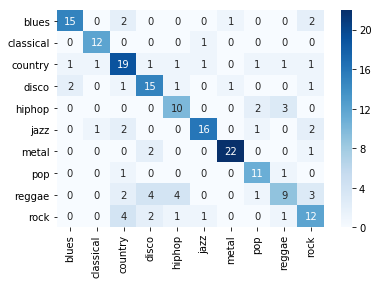

In [18]:
import seaborn as sns
%matplotlib inline
classes=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
sns.heatmap(cf_matrix, annot=True , cmap='Blues',xticklabels=classes,yticklabels=classes)

In [16]:
#LogisticRegression

In [17]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.12, solver='lbfgs', verbose=0 ,multi_class='auto').fit(X_train,y_train)
LR

LogisticRegression(C=0.12, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred = LR.predict(X_test)

In [20]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        35
           1       0.83      1.00      0.91        20
           2       0.64      0.68      0.66        37
           3       0.72      0.62      0.67        34
           4       0.65      0.71      0.68        24
           5       0.96      0.79      0.87        33
           6       0.68      0.90      0.77        30
           7       0.90      0.78      0.84        23
           8       0.54      0.48      0.51        29
           9       0.55      0.49      0.52        35

   micro avg       0.70      0.70      0.70       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.70      0.70      0.69       300



In [21]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

0.6966666666666667

In [22]:
#Support Vector Machines

In [23]:
from sklearn import svm

In [24]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [25]:
rbf = svm.SVC(kernel='rbf',degree=1,decision_function_shape='ovo' ).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=1,decision_function_shape='ovo' ).fit(X_train, y_train)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [27]:
print("Poly_pred:")
print (classification_report(y_test, poly_pred))

Poly_pred:
              precision    recall  f1-score   support

           0       0.39      0.45      0.42        20
           1       1.00      1.00      1.00        13
           2       0.73      0.59      0.65        27
           3       0.60      0.57      0.59        21
           4       0.61      0.73      0.67        15
           5       0.95      0.86      0.90        22
           6       0.69      0.88      0.77        25
           7       0.91      0.77      0.83        13
           8       0.56      0.43      0.49        23
           9       0.39      0.43      0.41        21

   micro avg       0.66      0.66      0.66       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.67      0.66      0.66       200



In [28]:
print("Rbf_pred:")
print (classification_report(y_test, rbf_pred))

Rbf_pred:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.86      0.92      0.89        13
           2       0.85      0.63      0.72        27
           3       0.57      0.62      0.59        21
           4       0.65      0.87      0.74        15
           5       0.83      0.91      0.87        22
           6       0.74      0.92      0.82        25
           7       0.80      0.62      0.70        13
           8       0.62      0.43      0.51        23
           9       0.45      0.48      0.47        21

   micro avg       0.70      0.70      0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.70      0.70      0.69       200



In [29]:
# ax = dataset[dataset['label'] == 'jazz'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='DarkBlue', label='jazz');
# dataset[dataset['label'] == 'metal'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Yellow', label='metal', ax=ax);
# dataset[dataset['label'] == 'classical'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Green', label='classical', ax=ax);
# dataset[dataset['label'] == 'blues'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Red', label='blues', ax=ax);
# dataset[dataset['label'] == 'pop'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Pink', label='pop', ax=ax);
# plt.show()

In [30]:
#Decsission Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [69]:
musicTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
musicTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
musicTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
predTree = musicTree.predict(X_test)

In [72]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.53


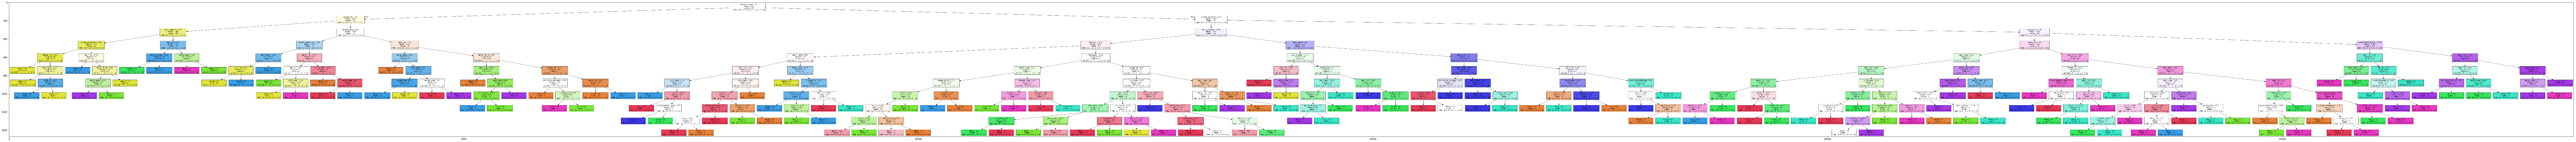

In [73]:
dot_data = StringIO()
filename = "musictree_30sec_10.png"
featureNames = dataset.columns[0:57]
targetNames = dataset["label"].unique().tolist()
out=tree.export_graphviz(musicTree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 400))
plt.imshow(img,interpolation='nearest')

In [74]:
#RandomForest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

In [86]:
rforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [87]:
predForest = rforest.predict(X_test)
print("Random Forrest Accuracy: ", metrics.accuracy_score(y_test, predForest))

Random Forrest Accuracy:  0.68
